In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_or_ham = pd.read_csv(filepath_or_buffer="spam_or_ham.csv",encoding="latin-1")
spam_or_ham

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
spam_or_ham.shape

(5572, 5)

In [4]:
data = spam_or_ham.copy()
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

# Data preprocessing

In [6]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [8]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.rename(columns={"v1":"class","v2":"sms"},inplace=True,)

In [10]:
data.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.duplicated().sum()

403

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
data.shape

(5169, 2)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5169 non-null   object
 1   sms     5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [16]:
data.isna().sum()

class    0
sms      0
dtype: int64

# EDA

In [17]:
data["class"].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

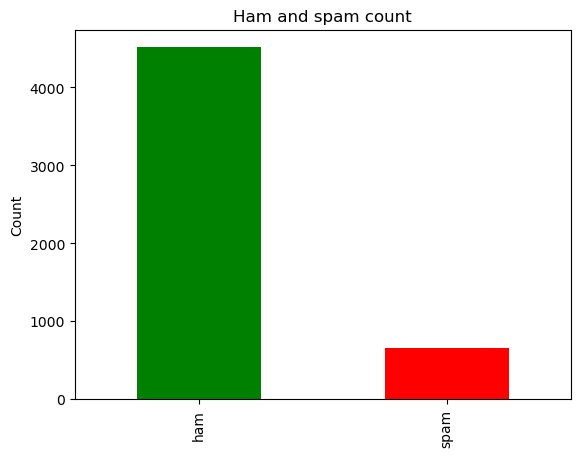

In [18]:
data["class"].value_counts().plot(kind="bar",color=["green","red"]).set(title="Ham and spam count")
plt.ylabel("Count")
plt.show()

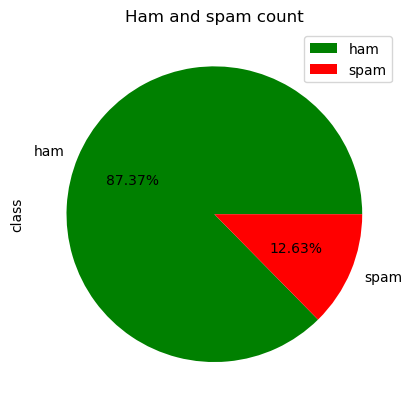

In [19]:
data["class"].value_counts().plot(kind="pie",colors=["green","red"],autopct="%.2f%%").set(title="Ham and spam count")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Text cleaning using regx,stopwords and stemming

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

words = stopwords.words("english")

data["cleaned_sms"] = list(map(lambda x: " ".join([w for w in re.sub("[^a-zA-Z0-9]"," ",x).lower().split() if w not in words]),data["sms"]))

data["cleaned_sms"] = data["cleaned_sms"].apply(lambda x: " ".join([stemmer.stem(w) for w in x.lower().split()]))

In [21]:
data

,class,sms,cleaned_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,ham,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [39]:
data.to_csv("new_cleaned_data.csv")

In [38]:
data["sms"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
data["cleaned_sms"][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [24]:
data["sms"][5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [25]:
data["cleaned_sms"][5567]

'2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut bt nation rate'

# Feature selection

In [26]:
X = data["cleaned_sms"]
y = data["class"]

In [27]:
data["class"].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=100,stratify=y)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


tfidf = TfidfVectorizer()
pipeline1 = Pipeline([("tfidf",tfidf),
                      ("chi",SelectKBest(score_func=chi2,k=1500)),
                      ("clf",LogisticRegression(max_iter=1000))])

pipeline1.fit(x_train,y_train)

y_pred_train = pipeline1.predict(x_train)
y_pred_test = pipeline1.predict(x_test)

print("Training score: ",accuracy_score(y_train,y_pred_train))
print("Test score: ",accuracy_score(y_test,y_pred_test))

Training score:  0.9615477629987909
Test score:  0.9632495164410058


In [30]:
from sklearn.svm import SVC

pipeline2 = Pipeline([("tfidf",tfidf),
                      ("chi",SelectKBest(score_func=chi2,k=1500)),
                      ("clf",SVC())])

pipeline2.fit(x_train,y_train)

y_pred_train = pipeline2.predict(x_train)
y_pred_test = pipeline2.predict(x_test)

print("Training score: ",accuracy_score(y_train,y_pred_train))
print("Test score: ",accuracy_score(y_test,y_pred_test))

Training score:  0.9985489721886336
Test score:  0.9690522243713733


In [31]:
from sklearn.tree import DecisionTreeClassifier

pipeline3 = Pipeline([("tfidf",tfidf),
                      ("chi",SelectKBest(score_func=chi2,k=1500)),
                      ("clf",DecisionTreeClassifier())])

pipeline3.fit(x_train,y_train)

y_pred_train = pipeline3.predict(x_train)
y_pred_test = pipeline3.predict(x_test)

print("Training score: ",accuracy_score(y_train,y_pred_train))
print("Test score: ",accuracy_score(y_test,y_pred_test))

Training score:  1.0
Test score:  0.9555125725338491


# Best model RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipeline4 = Pipeline([("tfidf",tfidf),
                      ("chi",SelectKBest(score_func=chi2,k=1500)),
                      ("clf",RandomForestClassifier(n_estimators=100))])

pipeline4.fit(x_train,y_train)

y_pred_train = pipeline4.predict(x_train)
y_pred_test = pipeline4.predict(x_test)

print("Training score: ",accuracy_score(y_train,y_pred_train))
print("Test score: ",accuracy_score(y_test,y_pred_test))

Training score:  1.0
Test score:  0.9787234042553191


In [33]:
# from sklearn.naive_bayes import GaussianNB

# pipeline4 = Pipeline([("tfidf",tfidf),
#                       ("chi",SelectKBest(score_func=chi2,k=1500)),
#                       ("clf",GaussianNB())])

# x_train = x_train
# x_test = x_test
# pipeline4.fit(x_train,y_train)

# y_pred_train = pipeline4.predict(x_train)
# y_pred_test = pipeline4.predict(x_test)

# print("Training score: ",accuracy_score(y_train,y_pred_train))
# print("Test score: ",accuracy_score(y_test,y_pred_test))

In [34]:
# x_train = pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)

In [35]:
# x_train
# x_test

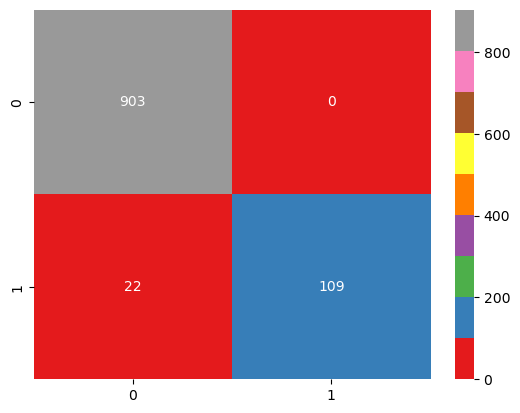

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred_test = pipeline4.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf_matrix,annot=True,cmap="Set1",fmt=".3g")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       903
        spam       1.00      0.83      0.91       131

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

